Python notebook to calculate tokenizer fertility and other potential stats based on a small text sample.

## Data loading and Libraries

In [2]:
import pandas as pd


In [3]:
# /home/p0l3/RAD/CWED4ETA/CWED4ETA/CWED4ETA/RESULTS/GLINER_TS_LS/
IDs = [10061, 10167, 10662, 1072, 10756, 12778, 13006, 13798, 16783, 16811, 170785, 170943, 171290, 171401, 20390, 21622, 22971, 2416, 27835, 28638, 28901, 30003, 32771, 33310, 35800, 36618, 39322, 40290, 41282, 45266, 46034, 48798, 50441, 53166, 55512, 56596, 62269, 63539, 65955, 6641, 71590, 72392, 72508, 72553, 75726, 84006, 86033, 87857, 90439, 99773]


In [4]:
import os
DIR = "/home/p0l3/RAD/REL_DIS/REL_DIS/TOKENIZED/PAPERS_SENTENCES"

file_list = os.listdir(DIR)

sample_list = [f for f in file_list if int(f.split("_")[0]) in IDs and "DUP" not in f]

## Model loading and inference

In [5]:
from transformers import BertTokenizer, RobertaTokenizer

# Load SciBERT tokenizer
tokenizer1 = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
tokenizer2 = BertTokenizer.from_pretrained("P0L3/clirebert_clirevocab_uncased")
tokenizer3 = RobertaTokenizer.from_pretrained("climatebert/distilroberta-base-climate-f")
tokenizer4 = BertTokenizer.from_pretrained("bert-base-uncased")

def average_subwords_per_word(tokenizer, paper_text: str):
    # Basic whitespace-based word split
    words = paper_text.strip().split()
    
    total_subwords = 0
    for word in words:
        subwords = tokenizer.tokenize(word)
        # print(f"Word: {word} --> Subwords: {subwords}")
        total_subwords += len(subwords)
    
    if len(words) == 0:
        return 0.0
    return round(total_subwords / len(words), 5)

print("SciBERT\tCliReBERT")
# for paper in sample_list:
#     with open(DIR + "/" + paper) as f:
#         paper_text = f.read()
    
#     print(average_subwords_per_word(tokenizer1, paper_text), "\t", average_subwords_per_word(tokenizer2, paper_text))


SciBERT	CliReBERT


In [6]:
import matplotlib.pyplot as plt

scibert_scores = []
clirebert_scores = []
climatebert_scores = []
bert_scores = []
paper_labels = []

for paper in sample_list:
    with open(DIR + "/" + paper) as f:
        paper_text = f.read()
    
    sci_score = average_subwords_per_word(tokenizer1, paper_text)
    cli_score = average_subwords_per_word(tokenizer2, paper_text)
    climate_score = average_subwords_per_word(tokenizer3, paper_text)
    bert_score = average_subwords_per_word(tokenizer4, paper_text)

    scibert_scores.append(sci_score)
    clirebert_scores.append(cli_score)
    climatebert_scores.append(climate_score)
    bert_scores.append(bert_score)
    
    paper_labels.append(paper.split("_")[0])

## Visuals

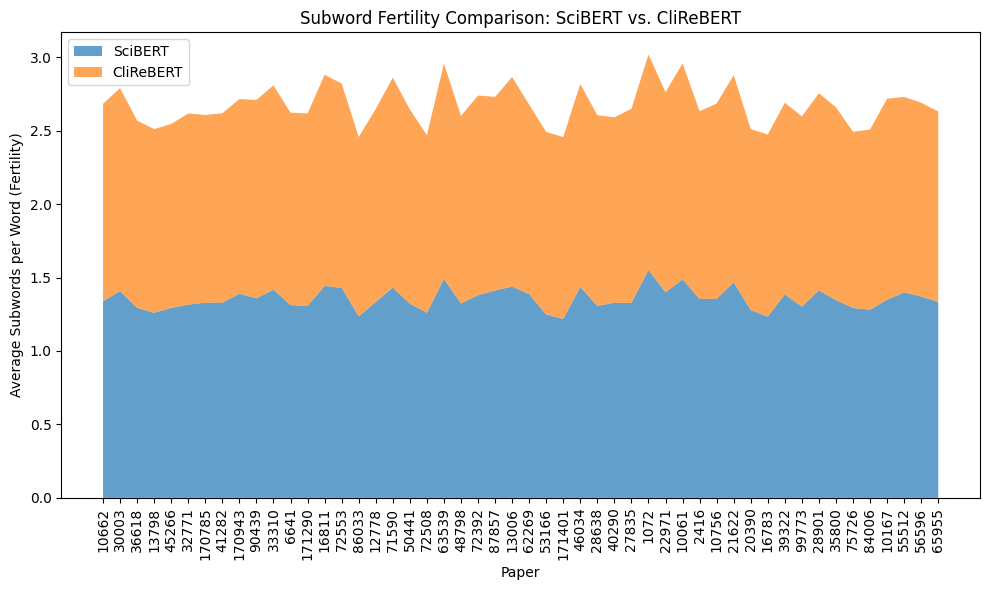

In [10]:
# Create stackplot
x = list(range(len(sample_list)))

plt.figure(figsize=(10, 6))
plt.stackplot(x, scibert_scores, clirebert_scores, labels=["SciBERT", "CliReBERT"], alpha=0.7)

plt.xticks(x, paper_labels, rotation=90)
plt.ylabel("Average Subwords per Word (Fertility)")
plt.xlabel("Paper")
plt.title("Subword Fertility Comparison: SciBERT vs. CliReBERT")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

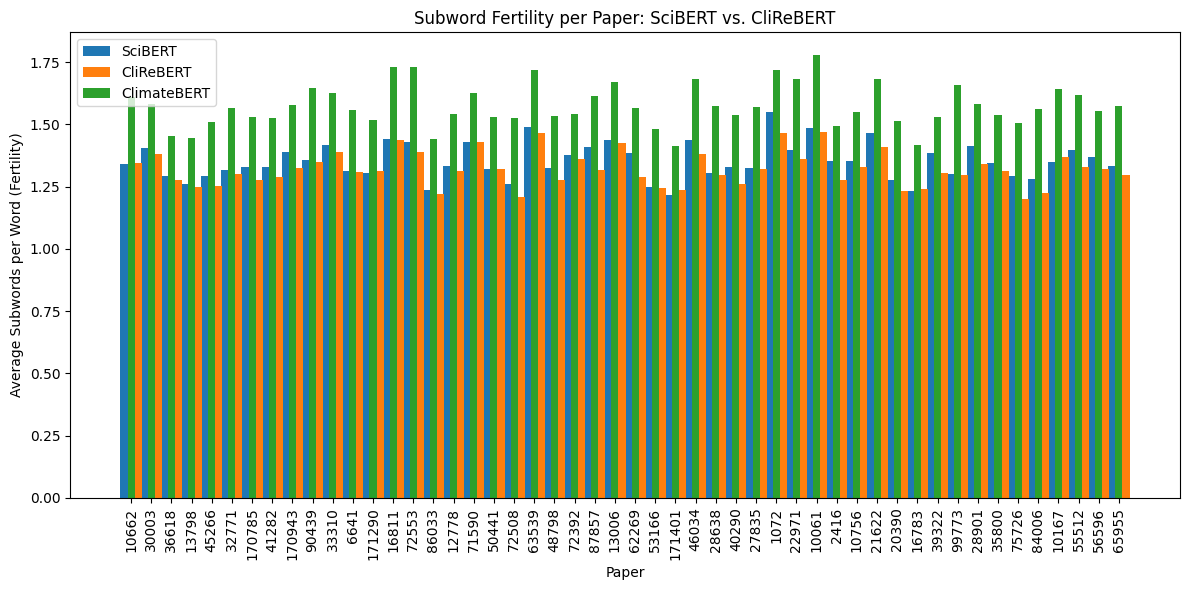

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(sample_list))  # X locations for groups
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width, scibert_scores, width, label="SciBERT")
plt.bar(x + width, clirebert_scores, width, label="CliReBERT")
plt.bar(x, climatebert_scores, width, label="ClimateBERT")

plt.ylabel("Average Subwords per Word (Fertility)")
plt.xlabel("Paper")
plt.title("Subword Fertility per Paper: SciBERT vs. CliReBERT")
plt.xticks(x, paper_labels, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


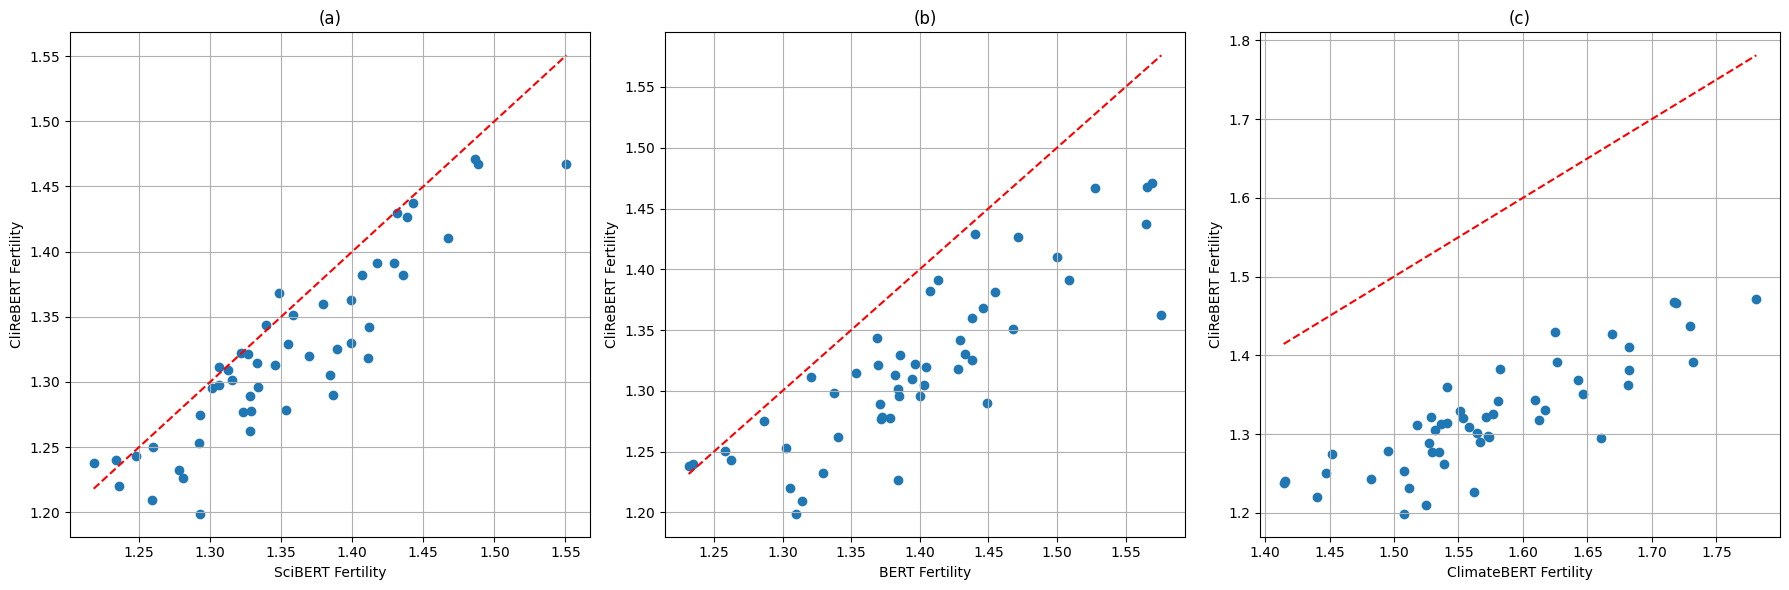

In [44]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# SciBERT vs. CliReBERT Fertility
axs[0].scatter(scibert_scores, clirebert_scores)
axs[0].plot([min(scibert_scores), max(scibert_scores)], [min(scibert_scores), max(scibert_scores)], 'r--')
axs[0].set_xlabel("SciBERT Fertility")
axs[0].set_ylabel("CliReBERT Fertility")
axs[0].set_title("(a)")
axs[0].grid(True)

# ClimateBERT vs. CliReBERT Fertility
axs[2].scatter(climatebert_scores, clirebert_scores)
axs[2].plot([min(climatebert_scores), max(climatebert_scores)], [min(climatebert_scores), max(climatebert_scores)], 'r--')
axs[2].set_xlabel("ClimateBERT Fertility")
axs[2].set_ylabel("CliReBERT Fertility")
axs[2].set_title("(c)")
axs[2].grid(True)

# BERT vs. CliReBERT Fertility
axs[1].scatter(bert_scores, clirebert_scores)
axs[1].plot([min(bert_scores), max(bert_scores)], [min(bert_scores), max(bert_scores)], 'r--')
axs[1].set_xlabel("BERT Fertility")
axs[1].set_ylabel("CliReBERT Fertility")
axs[1].set_title("(b)")
axs[1].grid(True)

# Adjust layout to make sure there is no overlap
plt.tight_layout()
plt.show()




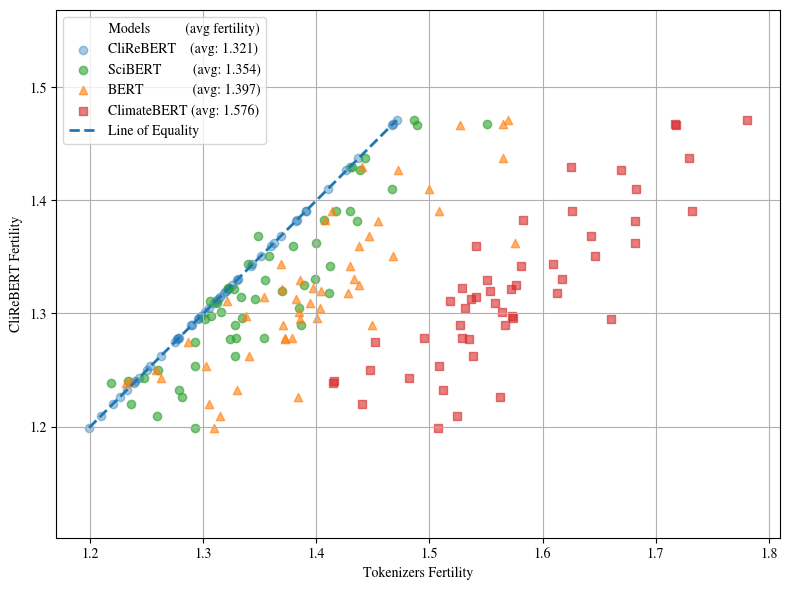

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Nimbus Roman"

# Compute averages
avg_scibert = np.mean(scibert_scores)
avg_climatebert = np.mean(climatebert_scores)
avg_bert = np.mean(bert_scores)
avg_clirebert = np.mean(clirebert_scores)

# Create a single figure and axis
plt.figure(figsize=(8, 6))

# CliReBERT entry
plt.scatter(clirebert_scores, clirebert_scores, color='tab:blue', alpha=0.4, label=f"CliReBERT    (avg: {avg_clirebert:.3f})")

# SciBERT vs. CliReBERT Fertility (Green circles)
plt.scatter(scibert_scores, clirebert_scores, color='tab:green',
            label=f"SciBERT         (avg: {avg_scibert:.3f})", alpha=0.6, marker='o')

# BERT vs. CliReBERT Fertility (Orange triangles)
plt.scatter(bert_scores, clirebert_scores, color='tab:orange',
            label=f"BERT              (avg: {avg_bert:.3f})", alpha=0.6, marker='^')

# ClimateBERT vs. CliReBERT Fertility (Red squares)
plt.scatter(climatebert_scores, clirebert_scores, color='tab:red',
            label=f"ClimateBERT (avg: {avg_climatebert:.3f})", alpha=0.6, marker='s')


# Line of equality

plt.plot([min(clirebert_scores), max(clirebert_scores)], 
         [min(clirebert_scores), max(clirebert_scores)], '--', color="tab:blue", linewidth=2, label="Line of Equality")
plt.axis("equal")

# Labels and legend
plt.xlabel("Tokenizers Fertility")
plt.ylabel("CliReBERT Fertility")
plt.legend(loc="upper left", title="           Models          (avg fertility)")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [37]:
print(min(scibert_scores), max(scibert_scores))

1.21811 1.55063


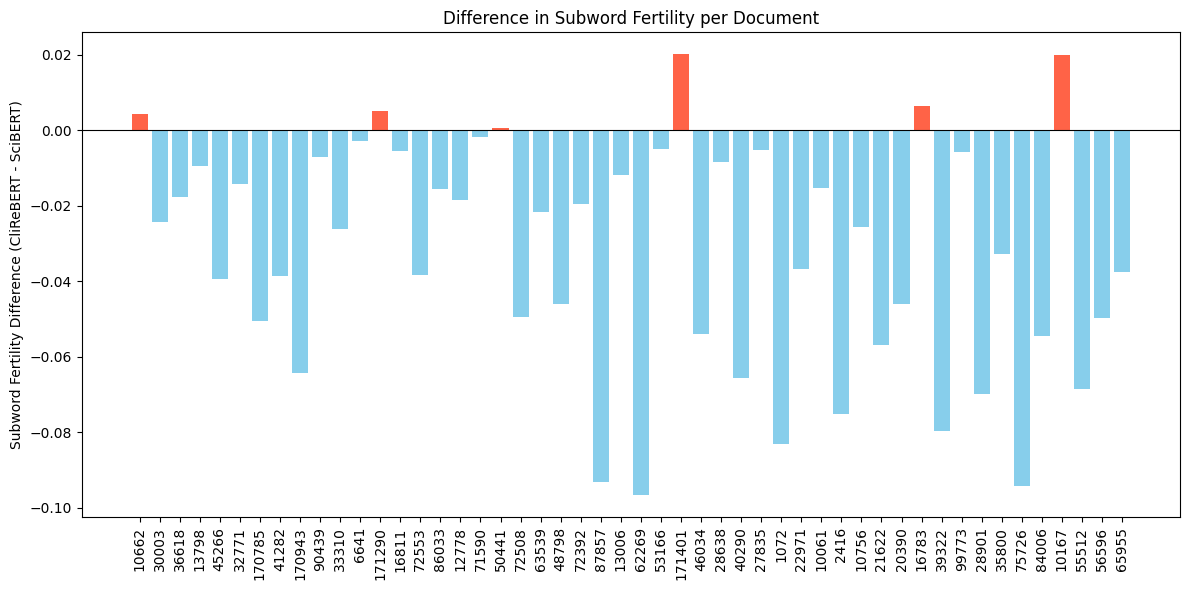

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Compute difference per paper
differences = np.array(clirebert_scores) - np.array(scibert_scores)

plt.figure(figsize=(12, 6))
bars = plt.bar(paper_labels, differences, color=np.where(differences > 0, 'tomato', 'skyblue'))

plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Subword Fertility Difference (CliReBERT - SciBERT)")
plt.title("Difference in Subword Fertility per Document")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


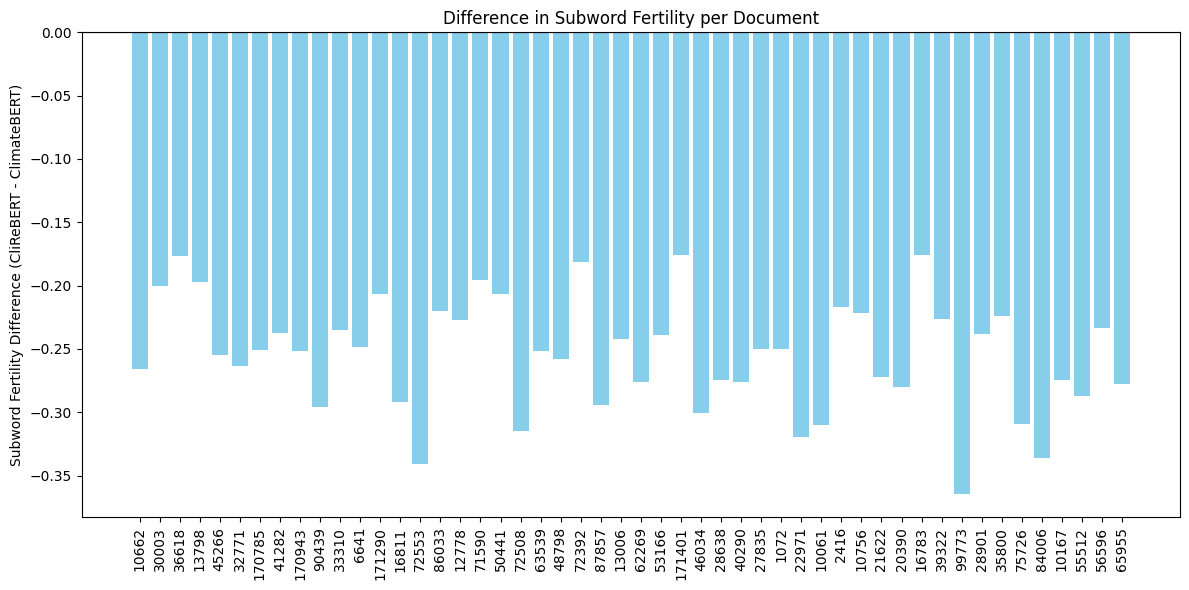

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Compute difference per paper
differences = np.array(clirebert_scores) - np.array(climatebert_scores)

plt.figure(figsize=(12, 6))
bars = plt.bar(paper_labels, differences, color=np.where(differences > 0, 'tomato', 'skyblue'))

plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Subword Fertility Difference (CliReBERT - ClimateBERT)")
plt.title("Difference in Subword Fertility per Document")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipykernel_46927/3865642432.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tokenizer_labels, y=all_scores, palette='muted')
/home/p0l3/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/p0l3/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/p0l3/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

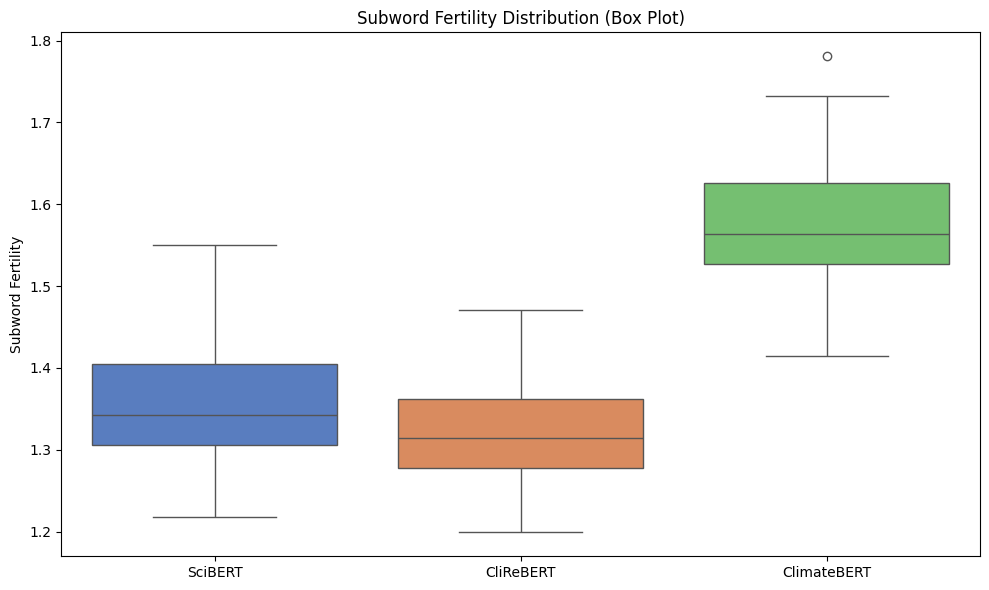

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Collect scores as in the violin plot
all_scores = scibert_scores + clirebert_scores + climatebert_scores
tokenizer_labels = ['SciBERT'] * len(scibert_scores) + ['CliReBERT'] * len(clirebert_scores) + ['ClimateBERT'] * len(climatebert_scores)

plt.figure(figsize=(10, 6))
sns.boxplot(x=tokenizer_labels, y=all_scores, palette='muted')
plt.ylabel("Subword Fertility")
plt.title("Subword Fertility Distribution (Box Plot)")
plt.tight_layout()
plt.show()



## Model kloze

In [16]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, pipeline
import torch

# Load the pretrained model and tokenizer
model_name = "P0L3/clirebert_clirevocab_uncased"  # Replace with actual model name
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# Move model to GPU if available
device = 0 if torch.cuda.is_available() else -1

# Create a fill-mask pipeline
fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer, device=device)

# Example input from scientific climate literature
text = "Climate Change is a [MASK]."

# Run prediction
predictions = fill_mask(text)

# Show top predictions
print(text)
print(10*">")
for p in predictions:
    print(f"{p['sequence']} — {p['score']:.4f}")

Climate Change is a [MASK].
>>>>>>>>>>
climate change is a challenge . — 0.2470
climate change is a concern . — 0.2395
climate change is a problem . — 0.0828
climate change is a threat . — 0.0579
climate change is a topic . — 0.0379


In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, pipeline
import torch

# Load the pretrained model and tokenizer
model_name = "P0L3/clirebert_clirevocab_uncased"  # Replace with actual model name
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# Move model to GPU if available
device = 0 if torch.cuda.is_available() else -1

# Create a fill-mask pipeline
fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer, device=device, top_k=10)

# Example input from scientific climate literature
text = "[CLS] The increase in greenhouse gas emissions has significantly affected the energy balance of the Earth. Greenhouse gas emissions [MASK] energy balance"

# Run prediction
predictions = fill_mask(text)

# Show top predictions
# print(text)
# print(10*">")
for p in predictions:
    print(f"{p['sequence']} — {p['score']:.4f}")

the increase in greenhouse gas emissions has significantly affected the energy balance of the earth . greenhouse gas emissions affect energy balance — 0.3099
the increase in greenhouse gas emissions has significantly affected the energy balance of the earth . greenhouse gas emissions and energy balance — 0.2608
the increase in greenhouse gas emissions has significantly affected the energy balance of the earth . greenhouse gas emissions balance energy balance — 0.0445
the increase in greenhouse gas emissions has significantly affected the energy balance of the earth . greenhouse gas emissions influence energy balance — 0.0390
the increase in greenhouse gas emissions has significantly affected the energy balance of the earth . greenhouse gas emissions . energy balance — 0.0315
the increase in greenhouse gas emissions has significantly affected the energy balance of the earth . greenhouse gas emissions impact energy balance — 0.0299
the increase in greenhouse gas emissions has significant

In [26]:
import torch
from transformers import BertTokenizer, BertForMaskedLM
import logging

# Suppress unnecessary warnings from transformers
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR)

# 1. Setup Model and Tokenizer
model_name = 'P0L3/clirebert_clirevocab_uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)
model.eval()  # Set model to evaluation mode

# For reproducibility
torch.manual_seed(42)

# Get the model's word embedding matrix. We'll use this to find replacement tokens.
embeddings = model.get_input_embeddings().weight

# 2. Define the Target and the Initial Prompt Structure
target_word = "wind"
target_id = tokenizer.convert_tokens_to_ids(target_word)

if target_id == tokenizer.unk_token_id:
    raise ValueError(f"Target word '{target_word}' is not in the model's vocabulary.")

# We want to find the 3 tokens represented by [UNK]
# The initial prompt can be anything, but [UNK] is a good neutral starting point.
initial_prompt = "[CLS] [UNK] [UNK] [UNK] [MASK] . [SEP]"
print(f"Goal: Maximize probability of '{target_word}' at the [MASK] position.")
print(f"Initial Prompt: {initial_prompt}\n" + "-" * 50)

# Convert to tensor. We will modify this tensor in the loop.
token_ids = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(initial_prompt))
input_ids = torch.tensor([token_ids])

# Find the positions of the tokens we want to optimize and the [MASK] token
optim_positions = [i for i, token_id in enumerate(token_ids) if token_id == tokenizer.unk_token_id]
mask_position = token_ids.index(tokenizer.mask_token_id)

# 3. Iterative Optimization Loop
num_iterations = 100
for iteration in range(num_iterations):
    # Each iteration, we find the single best token replacement to make.

    # We need to get the embeddings of our current prompt and enable gradient calculation
    input_embeddings = embeddings[input_ids].clone().detach()
    input_embeddings.requires_grad = True

    # Forward pass to get model's predictions (logits)
    outputs = model(inputs_embeds=input_embeddings)
    logits = outputs.logits

    # Calculate loss: The negative log-likelihood of our target word at the MASK position.
    # Minimizing this loss is equivalent to maximizing the probability.
    mask_logits = logits[0, mask_position, :]
    loss = -torch.nn.functional.log_softmax(mask_logits, dim=0)[target_id]

    # Backward pass to get gradients with respect to the input embeddings
    model.zero_grad()
    loss.backward()

    # The gradient for the embeddings of the entire sequence
    gradient = input_embeddings.grad[0]

    # --- "HotFlip" Step: Find the best single token to swap ---
    best_token_to_swap_id = -1
    best_position_to_swap = -1
    max_score_improvement = -float('inf')

    # Iterate through only the positions we are allowed to change
    for pos in optim_positions:
        # The gradient tells us the direction to move the embedding vector.
        # To maximize the score (minimize loss), we should move in the *negative* gradient direction.
        gradient_at_pos = gradient[pos]

        # Calculate the dot product of all vocabulary embeddings with the negative gradient.
        # This score measures how much a word's embedding is aligned with the desired change.
        scores = torch.matmul(embeddings, -gradient_at_pos)
        
        # Find the single best token to substitute at this position
        best_candidate_id = torch.argmax(scores).item()

        # Check if this swap is the best one we've seen in this iteration
        if scores[best_candidate_id] > max_score_improvement:
            max_score_improvement = scores[best_candidate_id].item()
            best_token_to_swap_id = best_candidate_id
            best_position_to_swap = pos
    
    # --- Perform the best swap ---
    old_token_id = input_ids[0, best_position_to_swap].item()
    
    # If the best token is the one we already have, we may have converged
    if old_token_id == best_token_to_swap_id:
        print(f"Iteration {iteration+1}: Converged. No better token found.")
        break
        
    old_token = tokenizer.convert_ids_to_tokens([old_token_id])[0]
    new_token = tokenizer.convert_ids_to_tokens([best_token_to_swap_id])[0]
    
    # Update the input_ids for the next iteration
    input_ids[0, best_position_to_swap] = best_token_to_swap_id
    
    current_prompt = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    print(f"Iter {iteration+1}: Replaced '{old_token}' with '{new_token}'. Loss: {loss.item():.4f}")
    print(f"  -> Prompt: {current_prompt}")


# 4. Final Result and Verification
final_prompt_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
final_prompt_text = " ".join(final_prompt_tokens).replace(" ##", "") # Clean up subwords

print("-" * 50 + "\nFinal Optimized Prompt:", final_prompt_text)

# Verify the probability with the final prompt
with torch.no_grad():
    outputs = model(input_ids)
    final_logits = outputs.logits[0, mask_position]
    final_probs = torch.nn.functional.softmax(final_logits, dim=0)
    final_prob_target = final_probs[target_id].item()
    
    top_5 = torch.topk(final_probs, 10)
    print(f"\nFinal probability of '{target_word}': {final_prob_target:.4%}")
    print("Top 5 predictions for the [MASK] token:")
    for i in range(10):
        token_id = top_5.indices[i].item()
        token_prob = top_5.values[i].item()
        print(f"  {i+1}. {tokenizer.convert_ids_to_tokens([token_id])[0]:<15} (Prob: {token_prob:.4%})")

Goal: Maximize probability of 'wind' at the [MASK] position.
Initial Prompt: [CLS] [UNK] [UNK] [UNK] [MASK] . [SEP]
--------------------------------------------------
Iter 1: Replaced '[UNK]' with 'blades'. Loss: 8.3364
  -> Prompt: blades.
Iter 2: Replaced 'blades' with 'easterly'. Loss: 7.3078
  -> Prompt: easterly.
Iter 3: Replaced 'easterly' with 'naked'. Loss: 1.7429
  -> Prompt: naked.
Iter 4: Replaced 'naked' with 'wind'. Loss: 11.1950
  -> Prompt: wind.
Iter 5: Replaced 'wind' with 'tropical'. Loss: 6.8106
  -> Prompt: tropical.
Iter 6: Replaced 'tropical' with 'wind'. Loss: 6.8242
  -> Prompt: wind.
Iter 7: Replaced 'wind' with 'tropical'. Loss: 6.8106
  -> Prompt: tropical.
Iter 8: Replaced 'tropical' with 'wind'. Loss: 6.8242
  -> Prompt: wind.
Iter 9: Replaced 'wind' with 'tropical'. Loss: 6.8106
  -> Prompt: tropical.
Iter 10: Replaced 'tropical' with 'wind'. Loss: 6.8242
  -> Prompt: wind.
Iter 11: Replaced 'wind' with 'tropical'. Loss: 6.8106
  -> Prompt: tropical.
Iter 

### ClimaQA cloze eval

In [1]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForMaskedLM

def evaluate_cloze_questions(csv_filepath, model, tokenizer, top_k=5):
    """
    Reads cloze questions from a CSV file and evaluates the model's ability
    to predict the correct answer for the [MASK] token.

    Args:
        csv_filepath (str): The path to the input CSV file.
        model: A loaded Hugging Face model for masked language modeling.
        tokenizer: The corresponding tokenizer for the model.
        top_k (int): The number of top predictions to consider for a correct answer.
    """
    # --- 1. Read the dataset ---
    try:
        df = pd.read_csv(csv_filepath)
        # Ensure the column names are 'Question' and 'Answer'
        if not all(col in df.columns for col in ['Question', 'Answer']):
            print(f"Error: CSV must contain 'Question' and 'Answer' columns.")
            return
    except FileNotFoundError:
        print(f"Error: The file '{csv_filepath}' was not found.")
        return

    # --- 2. Initialize tracking variables ---
    correct_predictions = 0
    total_questions = len(df)
    
    print(f"Starting evaluation on {total_questions} questions from '{csv_filepath}'...")
    print("-" * 50)
    model.eval()

    # --- 3. Loop through each question in the CSV ---
    for index, row in df.iterrows():
        text = row['Question']
        ground_truth_answer = str(row['Answer']).lower().strip()

        # Standardize the mask token to what the tokenizer expects (e.g., '[MASK]')
        # This handles cases where your CSV might use <MASK> or other variations.
        text = text.replace('<MASK>', tokenizer.mask_token)

        # --- 4. Perform MLM Prediction ---
        inputs = tokenizer(text, return_tensors='pt')
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits

        # Find the masked token's position and get top k predictions
        try:
            mask_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1].item()
            top_k_ids = torch.topk(logits[0, mask_index, :], k=top_k).indices.tolist()
            predicted_tokens = [tok.lower().strip() for tok in tokenizer.convert_ids_to_tokens(top_k_ids)]
        except (IndexError, ValueError, RuntimeError):
            print(f"Skipping row {index}: Could not find or process the MASK token in '{text}'")
            continue

        # --- 5. Check for correctness and print results ---
        print(f"Q: {text}")
        print(f"   Model Predictions: {predicted_tokens}")
        print(f"   Expected Answer:   {ground_truth_answer}")

        # The answer is correct if it's in the top K predictions
        if ground_truth_answer in predicted_tokens:
            correct_predictions += 1
            print("   Result: CORRECT\n")
        else:
            print("   Result: INCORRECT\n")

    # --- 6. Print Final Score ---
    accuracy = (correct_predictions / total_questions) * 100
    print("-" * 50)
    print("Evaluation Complete.")
    print(f"Final Score: {correct_predictions} / {total_questions} ({accuracy:.2f}%) correct")
    print(f"(An answer is considered correct if it appears in the top {top_k} predictions)")


if __name__ == '__main__':
    # --- Configuration ---
    # Use the climate-specific model that performed well
    MODEL_PATH = "P0L3/sciclimatebert"
    
    # IMPORTANT: Make sure this path points to your CSV file
    CSV_FILE = "/home/p0l3/Downloads/cloze_benchmark.csv" 

    # --- Load Model and Tokenizer ---
    print(f"Loading model: {MODEL_PATH}")
    tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
    model = AutoModelForMaskedLM.from_pretrained(MODEL_PATH)
    print("Model and tokenizer loaded successfully.\n")

    # --- Run Evaluation ---
    evaluate_cloze_questions(CSV_FILE, model, tokenizer, top_k=5)

Loading model: P0L3/sciclimatebert
Model and tokenizer loaded successfully.

Starting evaluation on 160 questions from '/home/p0l3/Downloads/cloze_benchmark.csv'...
--------------------------------------------------
Q: <mask> in the atmosphere can persist due to continual destabilization by external forcings, such as heating of the ground by the sun, which offsets stabilization by turbulence.
   Model Predictions: ['changes', 'increases', 'ice', 'heat', 'temperature']
   Expected Answer:   turbulence
   Result: INCORRECT

Q: Aerosol <mask> from the atmosphere to the oceans can enhance ocean productivity and carbon uptake, providing a feedback mechanism that can have a long-term effect on climate.
   Model Predictions: ['ġemitted', 'ġtransfer', 'ġheating', 'ġabsorption', 'ġloading']
   Expected Answer:   deposition
   Result: INCORRECT

Q: <mask> precipitation events can be identified by the presence of a radar bright band, which is a typical indicator of stratiform precipitation and ca

AttributeError: 'NoneType' object has no attribute 'lower'

In [54]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForMaskedLM

def evaluate_cloze_questions(csv_filepath, model, tokenizer, top_k=5):
    """
    Reads cloze questions from a CSV file and evaluates the model's ability
    to predict the correct answer for the [MASK] token.
    (This version is corrected for RoBERTa-style tokenizers).
    """
    try:
        df = pd.read_csv(csv_filepath)
        if not all(col in df.columns for col in ['Question', 'Answer']):
            print(f"Error: CSV must contain 'Question' and 'Answer' columns.")
            return
    except FileNotFoundError:
        print(f"Error: The file '{csv_filepath}' was not found.")
        return

    correct_predictions = 0
    total_questions = len(df)
    
    print(f"Starting evaluation on {total_questions} questions...")
    print("-" * 50)
    model.eval()

    for index, row in df.iterrows():
        text = row['Question']
        # print(f"Q: {text}")
        ground_truth_answer = str(row['Answer']).lower().strip()
        
        # RoBERTa uses <mask> instead of [MASK]
        text = text.replace('<MASK>', tokenizer.mask_token)

        inputs = tokenizer(text, return_tensors='pt')
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
        
        try:
            mask_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1].item()
            top_k_ids = torch.topk(logits[0, mask_index, :], k=top_k).indices.tolist()
            
            # --- THIS IS THE CRITICAL CHANGE ---
            # Decode the tokens and then clean them for comparison.
            raw_tokens = tokenizer.convert_ids_to_tokens(top_k_ids)
            # Remove the 'ġ' artifact for RoBERTa and strip whitespace/lowercase
            predicted_tokens = [tok.replace('ġ', '').replace("Ġ", "").lower().strip() for tok in raw_tokens if tok]

        # --- END OF CRITICAL CHANGE ---

        except (IndexError, ValueError, AttributeError):
            print(f"Skipping row {index}: Could not process MASK token in '{text}'")
            continue

        
        # print(f"   Model Predictions: {predicted_tokens}  (after cleaning from {raw_tokens})")
        # print(f"   Expected Answer:   {ground_truth_answer}")

        if ground_truth_answer in predicted_tokens:
            correct_predictions += 1
            # print("   Result: CORRECT\n")
        else:
            pass
            # print("   Result: INCORRECT\n")

    accuracy = (correct_predictions / total_questions) * 100
    print("-" * 50)
    print("Evaluation Complete.")
    print(f"Final Score: {correct_predictions} / {total_questions} ({accuracy:.2f}%) correct")
    print(f"(An answer is considered correct if it appears in the top {top_k} predictions)")

# --- You would run this with your RoBERTa model ---
if __name__ == '__main__':
    # Using a generic RoBERTa model for demonstration. 
    # Replace with your specific climate RoBERTa model path.
    # Use the climate-specific model that performed well
    MODEL_PATH = [# lIST OF MODELS
    "FacebookAI/roberta-base",
    "distilbert/distilroberta-base",
    "climatebert/distilroberta-base-climate-f",
    "P0L3/sciclimatebert",
    "google-bert/bert-base-uncased",
    "allenai/scibert_scivocab_uncased",
    "P0L3/cliscibert_scivocab_uncased",
    "P0L3/clirebert_clirevocab_uncased"][3]
    
    # IMPORTANT: Make sure this path points to your CSV file
    CSV_FILE = "/home/p0l3/Downloads/cloze_benchmark.csv" 

    print(f"Loading model: {MODEL_PATH}")
    tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
    model = AutoModelForMaskedLM.from_pretrained(MODEL_PATH)
    print("Model and tokenizer loaded successfully.\n")

    evaluate_cloze_questions(CSV_FILE, model, tokenizer, top_k=10)

Loading model: P0L3/sciclimatebert


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Model and tokenizer loaded successfully.

Starting evaluation on 160 questions...
--------------------------------------------------
--------------------------------------------------
Evaluation Complete.
Final Score: 36 / 160 (22.50%) correct
(An answer is considered correct if it appears in the top 10 predictions)


----------------------------------------------------------------------
Processing Model: FacebookAI/roberta-base
----------------------------------------------------------------------
  -> Evaluating for top_k = 1...
     Accuracy: 5.90%
  -> Evaluating for top_k = 2...
     Accuracy: 9.00%
  -> Evaluating for top_k = 3...
     Accuracy: 10.60%
  -> Evaluating for top_k = 4...
     Accuracy: 11.90%
  -> Evaluating for top_k = 5...
     Accuracy: 12.60%
  -> Evaluating for top_k = 6...
     Accuracy: 13.30%
  -> Evaluating for top_k = 7...
     Accuracy: 14.20%
  -> Evaluating for top_k = 8...
     Accuracy: 14.80%
  -> Evaluating for top_k = 9...
     Accuracy: 15.10%
  -> Evaluating for top_k = 10...
     Accuracy: 15.60%
----------------------------------------------------------------------
Processing Model: distilbert/distilroberta-base
----------------------------------------------------------------------


Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  -> Evaluating for top_k = 1...
     Accuracy: 6.90%
  -> Evaluating for top_k = 2...
     Accuracy: 9.10%
  -> Evaluating for top_k = 3...
     Accuracy: 11.10%
  -> Evaluating for top_k = 4...
     Accuracy: 12.50%
  -> Evaluating for top_k = 5...
     Accuracy: 13.40%
  -> Evaluating for top_k = 6...
     Accuracy: 14.10%
  -> Evaluating for top_k = 7...
     Accuracy: 15.20%
  -> Evaluating for top_k = 8...
     Accuracy: 15.80%
  -> Evaluating for top_k = 9...
     Accuracy: 16.60%
  -> Evaluating for top_k = 10...
     Accuracy: 17.00%
----------------------------------------------------------------------
Processing Model: climatebert/distilroberta-base-climate-f
----------------------------------------------------------------------
  -> Evaluating for top_k = 1...
     Accuracy: 10.40%
  -> Evaluating for top_k = 2...
     Accuracy: 12.50%
  -> Evaluating for top_k = 3...
     Accuracy: 13.90%
  -> Evaluating for top_k = 4...
     Accuracy: 14.90%
  -> Evaluating for top_k = 5.

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  -> Evaluating for top_k = 1...
     Accuracy: 8.30%
  -> Evaluating for top_k = 2...
     Accuracy: 11.20%
  -> Evaluating for top_k = 3...
     Accuracy: 13.70%
  -> Evaluating for top_k = 4...
     Accuracy: 14.80%
  -> Evaluating for top_k = 5...
     Accuracy: 16.20%
  -> Evaluating for top_k = 6...
     Accuracy: 16.60%
  -> Evaluating for top_k = 7...
     Accuracy: 17.30%
  -> Evaluating for top_k = 8...
     Accuracy: 18.00%
  -> Evaluating for top_k = 9...
     Accuracy: 19.10%
  -> Evaluating for top_k = 10...
     Accuracy: 19.50%
----------------------------------------------------------------------
Processing Model: allenai/scibert_scivocab_uncased
----------------------------------------------------------------------


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  -> Evaluating for top_k = 1...
     Accuracy: 17.90%
  -> Evaluating for top_k = 2...
     Accuracy: 23.20%
  -> Evaluating for top_k = 3...
     Accuracy: 26.60%
  -> Evaluating for top_k = 4...
     Accuracy: 29.20%
  -> Evaluating for top_k = 5...
     Accuracy: 31.10%
  -> Evaluating for top_k = 6...
     Accuracy: 32.10%
  -> Evaluating for top_k = 7...
     Accuracy: 33.30%
  -> Evaluating for top_k = 8...
     Accuracy: 34.00%
  -> Evaluating for top_k = 9...
     Accuracy: 35.60%
  -> Evaluating for top_k = 10...
     Accuracy: 36.30%
----------------------------------------------------------------------
Processing Model: P0L3/cliscibert_scivocab_uncased
----------------------------------------------------------------------
  -> Evaluating for top_k = 1...
     Accuracy: 24.30%
  -> Evaluating for top_k = 2...
     Accuracy: 32.00%
  -> Evaluating for top_k = 3...
     Accuracy: 35.20%
  -> Evaluating for top_k = 4...
     Accuracy: 38.50%
  -> Evaluating for top_k = 5...
   

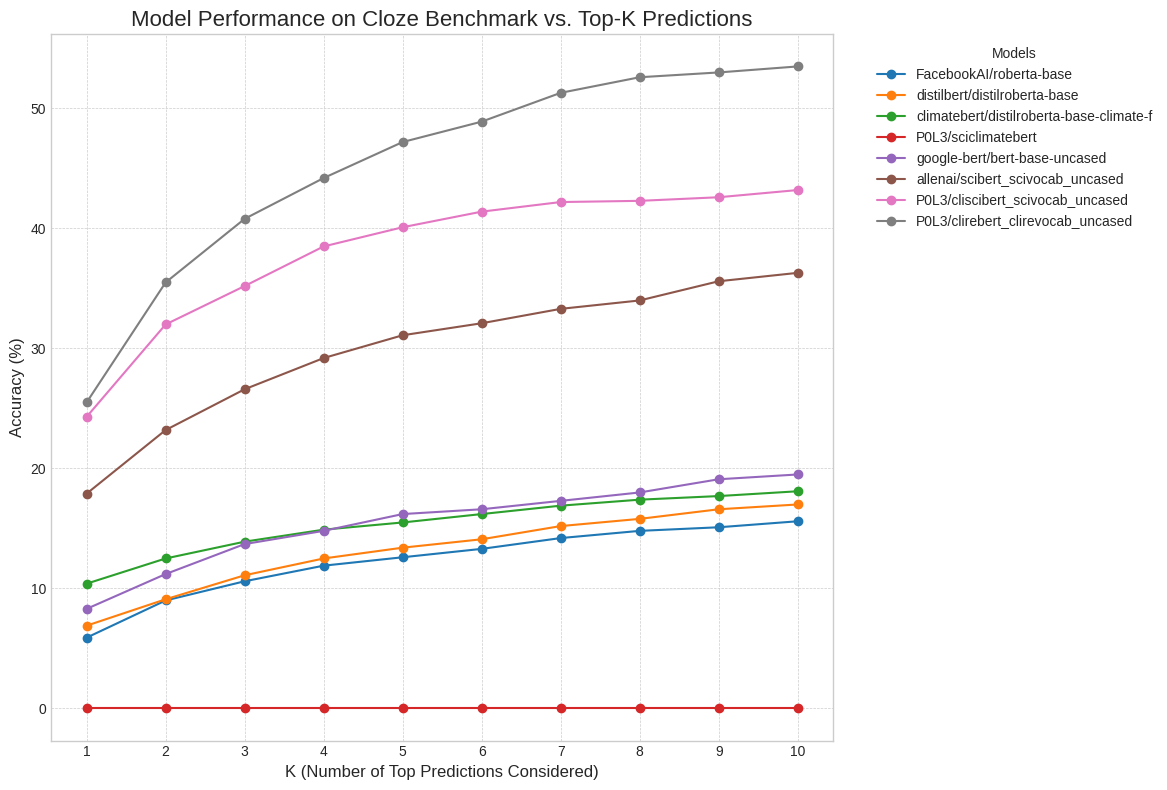

In [11]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForMaskedLM
import gc # Garbage Collector interface
import re

def evaluate_cloze_questions(csv_filepath, model, tokenizer, top_k=5, verbose=False):
    """
    Reads cloze questions from a CSV, evaluates the model, and returns the accuracy.
    (This version is corrected for RoBERTa-style tokenizers).

    Args:
        csv_filepath (str): Path to the CSV file.
        model: The pre-trained model.
        tokenizer: The tokenizer for the model.
        top_k (int): The number of top predictions to consider for a correct answer.
        verbose (bool): If True, prints detailed progress for each question.

    Returns:
        float: The accuracy of the model on the cloze task (0-100).
    """
    try:
        df = pd.read_csv(csv_filepath)
        if not all(col in df.columns for col in ['Question', 'Answer']):
            print(f"Error: CSV must contain 'Question' and 'Answer' columns.")
            return 0.0
    except FileNotFoundError:
        print(f"Error: The file '{csv_filepath}' was not found.")
        return 0.0

    correct_predictions = 0
    total_questions = len(df)
    if total_questions == 0:
        return 0.0

    model.eval() # Set model to evaluation mode

    for index, row in df.iterrows():
        text = str(row['Question'])
        ground_truth_answer = str(row['Answer']).lower().strip()

        # Some models use <mask>, others use [MASK]. Use the tokenizer's special token.
        # This handles cases like RoBERTa (<mask>) and BERT ([MASK]) automatically.
        text = text.replace('<MASK>', tokenizer.mask_token)
        text = text.replace('[MASK]', tokenizer.mask_token)
        
        if len(re.findall(re.escape(tokenizer.mask_token), text)) > 1:
            # print(f"Skipping row {index}: Found multiple MASK tokens in '{text}'")
            continue
        

        inputs = tokenizer(text, return_tensors='pt')
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits

        try:
            mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1].item()
        except (IndexError, ValueError):
            if verbose:
                print(f"Skipping row {index}: Could not find MASK token in '{text}'")
            continue

        top_k_ids = torch.topk(logits[0, mask_token_index, :], k=top_k).indices.tolist()

        # Decode the tokens and then clean them for comparison.
        raw_tokens = tokenizer.convert_ids_to_tokens(top_k_ids)
        # Handle BPE artifacts (like RoBERTa's 'ġ' or 'Ġ') and clean up
        predicted_tokens = [tok.replace('ġ', '').replace('Ġ', '').lower().strip() for tok in raw_tokens]

        if verbose:
            print(f"Q: {text}")
            print(f"   Model Predictions: {predicted_tokens} (from {raw_tokens})")
            print(f"   Expected Answer:   {ground_truth_answer}")

        if ground_truth_answer in predicted_tokens:
            correct_predictions += 1
            if verbose: print("   Result: CORRECT\n")
        elif verbose:
            print("   Result: INCORRECT\n")

    accuracy = (correct_predictions / total_questions) * 100
    return accuracy

def plot_results(results_df):
    """
    Plots the evaluation results using matplotlib.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))

    for model_name in results_df.index:
        ax.plot(
            results_df.columns,
            results_df.loc[model_name],
            marker='o',
            linestyle='-',
            label=model_name
        )

    # Use integer values for Top-K on the x-axis
    k_values = [int(col.replace('Top-', '').replace(' Acc (%)', '')) for col in results_df.columns]
    plt.xticks(ticks=results_df.columns, labels=k_values)
    
    ax.set_title('Model Performance on Cloze Benchmark vs. Top-K Predictions', fontsize=16)
    ax.set_xlabel('K (Number of Top Predictions Considered)', fontsize=12)
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.legend(title='Models', bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make room for legend
    
    # Save the plot to a file
    plot_filename = 'cloze_benchmark_comparison.png'
    plt.savefig(plot_filename)
    print(f"\nPlot saved as '{plot_filename}'")
    
    plt.show()


# --- Main Execution Block ---
if __name__ == '__main__':
    MODEL_PATHS = [
        "FacebookAI/roberta-base",
        "distilbert/distilroberta-base",
        "climatebert/distilroberta-base-climate-f",
        "P0L3/sciclimatebert",
        "google-bert/bert-base-uncased",
        "allenai/scibert_scivocab_uncased",
        "P0L3/cliscibert_scivocab_uncased",
        "P0L3/clirebert_clirevocab_uncased"
    ]
    
    # IMPORTANT: Make sure this path points to your CSV file
    CSV_FILE = "/home/p0l3/Downloads/cloze_benchmark_silver.csv" 
    TOP_K_RANGE = range(1, 11) # This will evaluate for k=1, 2, ..., 10

    # Dictionary to store all results
    all_results = {}

    for model_path in MODEL_PATHS:
        print("-" * 70)
        print(f"Processing Model: {model_path}")
        print("-" * 70)

        try:
            # Load model and tokenizer
            tokenizer = AutoTokenizer.from_pretrained(model_path)
            model = AutoModelForMaskedLM.from_pretrained(model_path)
            
            # Optional: Move model to GPU if available
            # device = "cuda" if torch.cuda.is_available() else "cpu"
            # model.to(device)

            model_accuracies = []
            for k in TOP_K_RANGE:
                print(f"  -> Evaluating for top_k = {k}...")
                accuracy = evaluate_cloze_questions(CSV_FILE, model, tokenizer, top_k=k)
                model_accuracies.append(accuracy)
                print(f"     Accuracy: {accuracy:.2f}%")
            
            all_results[model_path] = model_accuracies

            # Clean up memory before loading the next model
            del model
            del tokenizer
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        except Exception as e:
            print(f"Could not process model {model_path}. Error: {e}")
            # Fill with zeros or NaNs if a model fails
            all_results[model_path] = [0.0] * len(TOP_K_RANGE)
            continue

    # --- Generate and Print Results Table ---
    print("\n" + "="*70)
    print("                 CLOZE BENCHMARK RESULTS                 ")
    print("="*70)

    # Create column names like "Top-1 Acc (%)", "Top-2 Acc (%)", etc.
    columns = [f"Top-{k} Acc (%)" for k in TOP_K_RANGE]
    results_df = pd.DataFrame.from_dict(all_results, orient='index', columns=columns)
    
    # Format the DataFrame for better display
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(results_df.to_string(float_format="%.2f"))

    # --- Generate and Show Plot ---
    if not results_df.empty:
        plot_results(results_df)

In [15]:
results_df = pd.read_csv("cloze_silver_benchmark_comparison.csv", index_col=0)
print(results_df)

                                          Top-1 Acc (%)  Top-2 Acc (%)  Top-3 Acc (%)  Top-4 Acc (%)  Top-5 Acc (%)  Top-6 Acc (%)  Top-7 Acc (%)  Top-8 Acc (%)  Top-9 Acc (%)  Top-10 Acc (%)
FacebookAI/roberta-base                             5.9            9.0           10.6           11.9           12.6           13.3           14.2           14.8           15.1            15.6
distilbert/distilroberta-base                       6.9            9.1           11.1           12.5           13.4           14.1           15.2           15.8           16.6            17.0
climatebert/distilroberta-base-climate-f           10.4           12.5           13.9           14.9           15.5           16.2           16.9           17.4           17.7            18.1
P0L3/sciclimatebert                                 0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0            0.0             0.0
google-bert/bert-base-uncased           

In [69]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, RoBERTa to CliReBERT
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Top-1 Acc (%)   8 non-null      float64
 1   Top-2 Acc (%)   8 non-null      float64
 2   Top-3 Acc (%)   8 non-null      float64
 3   Top-4 Acc (%)   8 non-null      float64
 4   Top-5 Acc (%)   8 non-null      float64
 5   Top-6 Acc (%)   8 non-null      float64
 6   Top-7 Acc (%)   8 non-null      float64
 7   Top-8 Acc (%)   8 non-null      float64
 8   Top-9 Acc (%)   8 non-null      float64
 9   Top-10 Acc (%)  8 non-null      float64
dtypes: float64(10)
memory usage: 704.0+ bytes


Advanced plot saved as 'advanced_cloze_benchmark_comparison_5s.png'


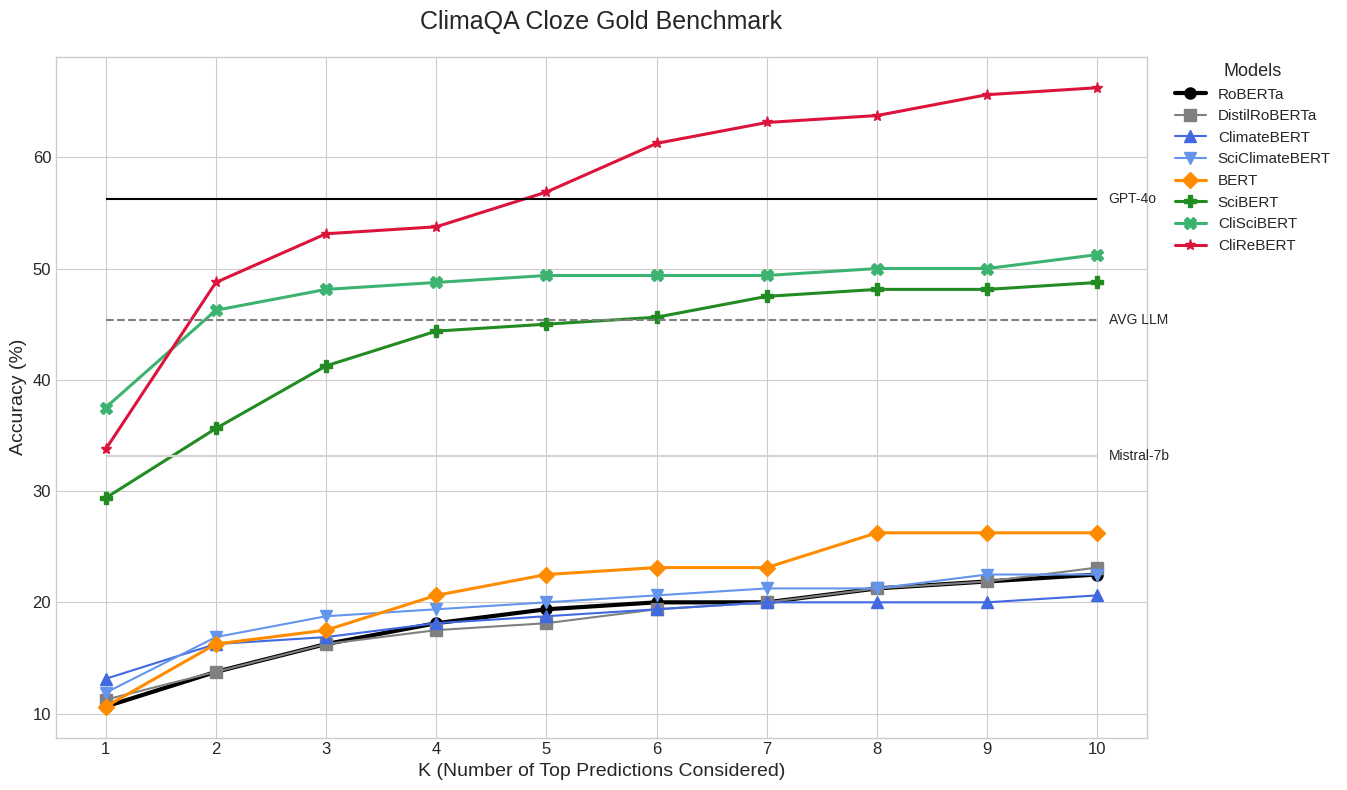

In [92]:
# --- 2. Define Visual Mappings for the Plot ---

# Define the models in the order they appear in your DataFrame
model_names = results_df.index.tolist()
# a) Grouping by Size -> Mapped to Line Width
# Biggest (index 0), Smallest (indices 1-3), Medium (indices 4-7)
linewidths = {
    'RoBERTa': 3.0,        # Biggest
    'DistilRoBERTa': 1.5,  # Smallest
    'ClimateBERT': 1.5,    # Smallest
    'SciClimateBERT': 1.5, # Smallest
    'BERT': 2.2,           # Medium
    'SciBERT': 2.2,        # Medium
    'CliSciBERT': 2.2,     # Medium
    'CliReBERT': 2.2       # Medium
}

# b) Paired Colors + Unique Colors for others
# Pair (ClimateBERT, SciClimateBERT) -> Blues
# Pair (SciBERT, CliSciBERT) -> Greens
colors = {
    'RoBERTa': 'black',
    'DistilRoBERTa': 'gray',
    'ClimateBERT': 'royalblue',      # Pair 1: Darker Blue
    'SciClimateBERT': 'cornflowerblue', # Pair 1: Lighter Blue
    'BERT': 'darkorange',
    'SciBERT': 'forestgreen',      # Pair 2: Darker Green
    'CliSciBERT': 'mediumseagreen', # Pair 2: Lighter Green
    'CliReBERT': 'crimson'          # Standout color for the best performer
}

# c) Unique Marker (shape) for each model for clarity and accessibility
markers = ['o', 's', '^', 'v', 'D', 'P', 'X', '*']
marker_map = {model: markers[i] for i, model in enumerate(model_names)}


# --- 3. Create the Plot ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 8))

# Plot each model's data using the defined visual properties
for model_name in model_names:
    ax.plot(results_df.columns,
            results_df.loc[model_name],
            label=model_name,
            marker=marker_map[model_name],
            color=colors[model_name],
            linewidth=linewidths[model_name],
            markersize=8,
            linestyle='-')

ax.hlines(y=[33.12, 45.356, 56.25], xmin=0, xmax=9, colors=['lightgray', 'gray', 'black'], linestyles=['-', '--', '-'])
ax.text(9.1, 33.12, 'Mistral-7b', ha='left', va='center')
ax.text(9.1, 45.356, 'AVG LLM', ha='left', va='center')
ax.text(9.1, 56.25, 'GPT-4o', ha='left', va='center')


# --- 4. Customize and Finalize the Plot ---

# Set clean integer labels for the x-axis
k_values = [int(col.split('-')[1].split(' ')[0]) for col in results_df.columns]
ax.set_xticks(results_df.columns)
ax.set_xticklabels(k_values)

# Set titles and labels with increased font size for readability
ax.set_title('ClimaQA Cloze Gold Benchmark', fontsize=18, pad=20)
ax.set_xlabel('K (Number of Top Predictions Considered)', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Create a legend and place it outside the plot area
# This is crucial for busy plots to avoid covering data lines
legend = ax.legend(
    title='Models',
    fontsize=11,
    title_fontsize=13,
    bbox_to_anchor=(1.02, 1), # Position the legend outside
    loc='upper left',
    borderaxespad=0.
)

# Optional: Set a title for the legend manually if needed
# legend.set_title('Models (Grouped by Size/Type)', prop={'size':13})

# Adjust layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # rect=[left, bottom, right, top]

# Save the plot to a file
plot_filename = 'advanced_cloze_benchmark_comparison_5s.png'
plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

print(f"Advanced plot saved as '{plot_filename}'")

# Display the plot
plt.show()